<a href="https://colab.research.google.com/github/shrishtinigam/Computer_Vision_OpenCV/blob/main/Computer_Vision_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display

In [ ]:
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
urls = ["https://upload.wikimedia.org/wikipedia/commons/d/da/Strawberry_ice_cream_cone_%285076899310%29.jpg"]
urls = ["https://backlightblog.com/images/2021/09/low-contrast-photography-1.jpg"]

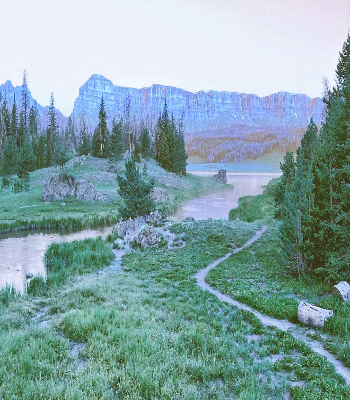

In [ ]:
images = []
for url in urls:
  image = io.imread(url)
  resized = cv2.resize(image, (350, 400))
  cv2_imshow(resized)
  images.append(resized)
  print('\n')

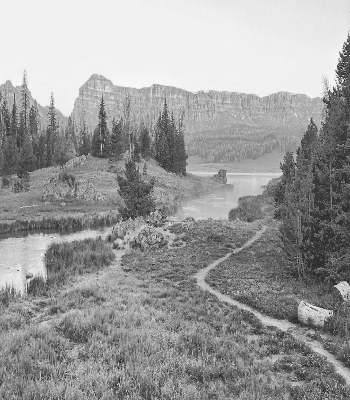

In [ ]:
gray_image = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

# 1.	Find the mean of the grayscale image

In [ ]:
def mean(image):
  image = image.astype(np.float64)
  shape = image.shape
  image_ones = np.ones(image.shape)
  sum = 0
  for i in range(len(image)):
    for j in range(len(image[0])):
      sum += image[i][j]
  avg = sum/(shape[0]*shape[1])
  print("Mean:", avg)
  mean_image = image_ones*avg
  cv2_imshow(mean_image)

Mean: 155.6913


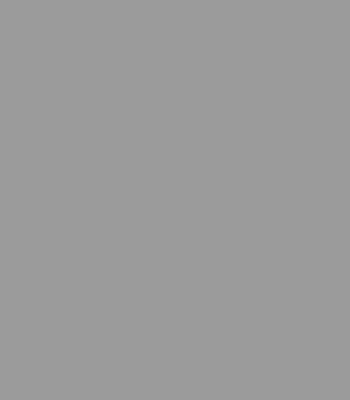

In [ ]:
mean(gray_image)

# 2.	Apply zero padding, find the mean of the resultant image

In [ ]:
def applyPadding(image, pad):
  padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=pad)
  cv2_imshow(padded)
  return padded

In [ ]:
applyPadding(np.array([[3,3,3,3,3],[4,4,4,4,4]]), 0)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 4, 4, 4, 4, 4, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

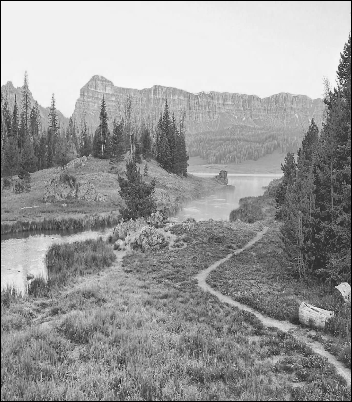

Mean: 154.0365078018996


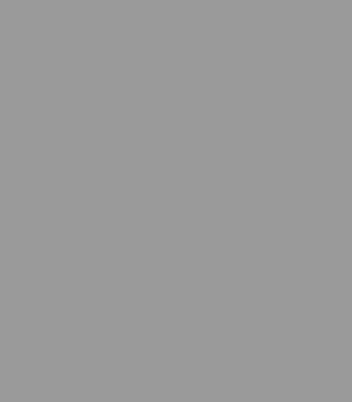

In [ ]:
padded = applyPadding(gray_image, 0)
mean(padded)

# 3.	Apply high padding, find the mean of the resultant image

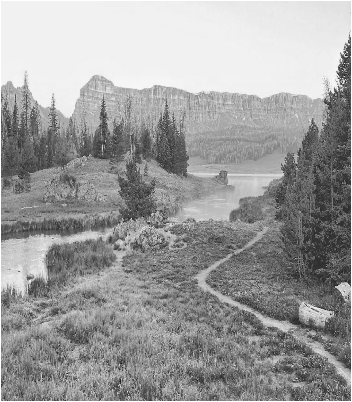

Mean: 156.7468198778833


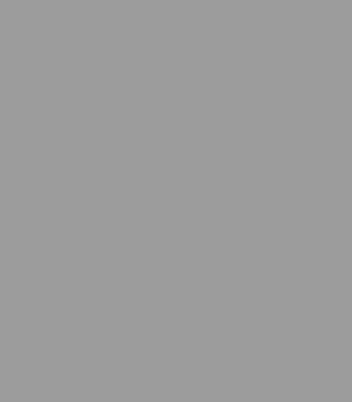

In [ ]:
padded = applyPadding(gray_image, 255)
mean(padded)

# 4.	Apply mid padding, find the mean of the resultant image

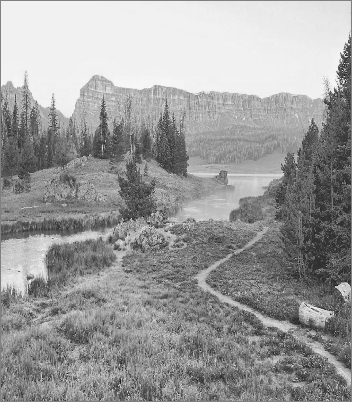

Mean: 155.39697817729535


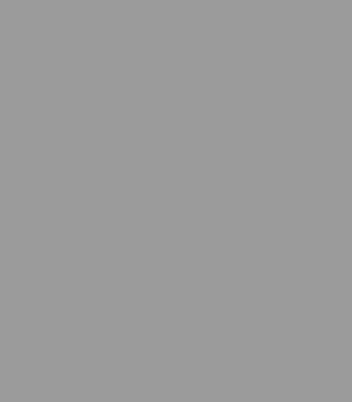

In [ ]:
padded = applyPadding(gray_image, 128)
mean(padded)

# 5.	Write the inference obtained from 1, 2, 3, 4

From the results we observe that Zero padding mean < Mid padding mean < High padding mean. Although the mean values are close to each other. This is consistent with the fact that zero padding (0) < mid padding (128) < high padding (255).

# 6.	Apply image smoothening (say, median filter, max filter, min filter, average filter) to any of 3x3 region of interest in the grayscale image

## Average Filter

In [ ]:
def meanFilter(image):
  kernel = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
  image_mean = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
  print(image_mean)
  cv2_imshow(image_mean)

[[241 241 241 ... 223 222 221]
 [241 241 241 ... 223 222 221]
 [241 241 241 ... 223 222 221]
 ...
 [129 128 107 ...  96  98  99]
 [122 132 120 ... 107 104 108]
 [128 141 139 ... 110 110 109]]


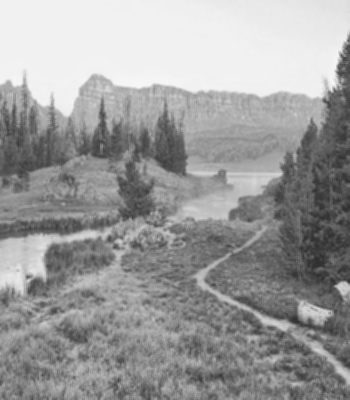

In [ ]:
meanFilter(gray_image)

Manual code:

In [ ]:
def meanFilter2(image):
  image = image.astype(np.float64)
  shape = image.shape
  R = shape[0]
  C = shape[1]
  print(type(image[0][0]))
  for i in range(1,R-1):
    for j in range(1,C-1):
      image[i][j] = (image[i-1][j-1] + image[i+1][j-1] + image[i-1][j+1] + image[i+1][j+1] + image[i][j-1] + image[i][j+1] + image[i-1][j] + image[i+1][j] + image[i][j])/9
  cv2_imshow(image)

<class 'numpy.float64'>


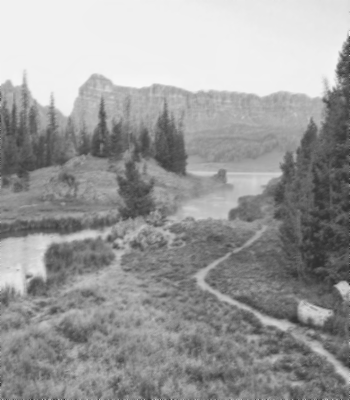

In [ ]:
meanFilter2(gray_image)

## Median Filter

In [ ]:
def medianFilter(image):
  median = cv2.medianBlur(image,3)
  cv2_imshow(median)

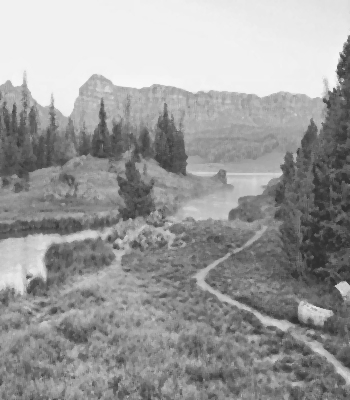

In [ ]:
medianFilter(gray_image)

Manual code:

In [ ]:
import statistics

def medianFilter2(image):
  image = image.astype(np.float64)
  shape = image.shape
  R = shape[0]
  C = shape[1]
  print(type(image[0][0]))
  for i in range(1,R-1):
    for j in range(1,C-1):
      neighbours = [image[i-1][j-1] , image[i+1][j-1] , image[i-1][j+1] , image[i+1][j+1] , image[i][j-1] , image[i][j+1] , image[i-1][j] , image[i+1][j]]
      image[i][j] = statistics.median(neighbours)
  cv2_imshow(image)

<class 'numpy.float64'>


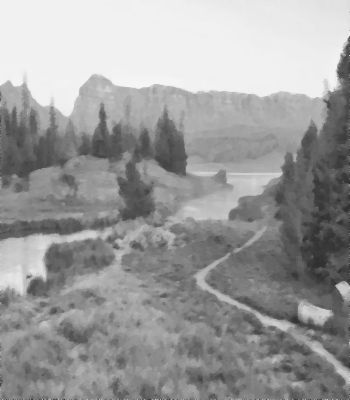

In [ ]:
medianFilter2(gray_image)

## Max Filter

In [ ]:
def maxFilter(image):
  size = (3, 3)
  shape = cv2.MORPH_RECT
  kernel = cv2.getStructuringElement(shape, size)
  min_image = cv2.dilate(image, kernel)
  cv2_imshow(min_image)

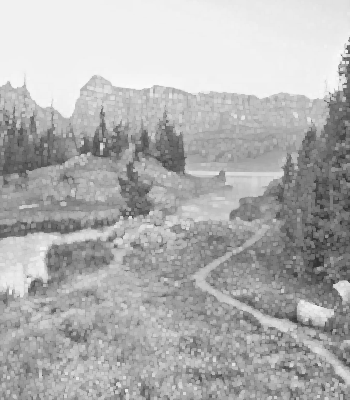

In [ ]:
maxFilter(gray_image)

Manual Code:

In [ ]:
def maxFilter2(image):
  shape = image.shape
  temp = image.copy()
  R = shape[0]
  C = shape[1]
  print(type(image[0][0]))
  for i in range(1,R-1):
    for j in range(1,C-1):
      temp[i][j] = max(image[i-1][j-1] , image[i+1][j-1] , image[i-1][j+1] , image[i+1][j+1] , image[i][j-1] , image[i][j+1] , image[i-1][j])
  cv2_imshow(temp)

<class 'numpy.uint8'>


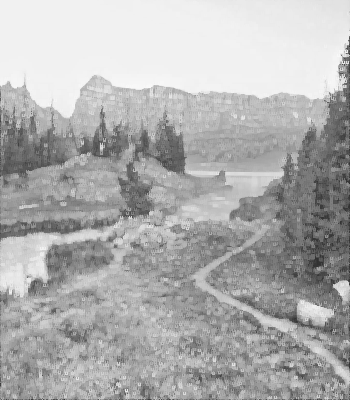

In [ ]:
maxFilter2(gray_image)

## Min Filter

In [ ]:
def minFilter(image):
  size = (3, 3)
  shape = cv2.MORPH_RECT
  kernel = cv2.getStructuringElement(shape, size)
  min_image = cv2.erode(image, kernel)
  cv2_imshow(min_image)

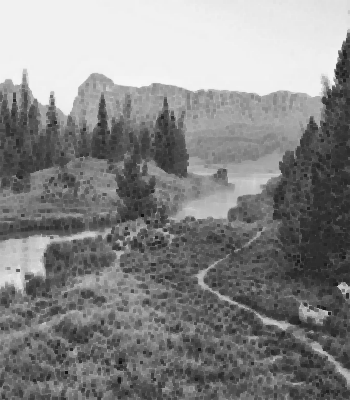

In [ ]:
minFilter(gray_image)

Manual Code:

In [ ]:
def minFilter2(image):
  shape = image.shape
  temp = image.copy()
  R = shape[0]
  C = shape[1]
  print(type(image[0][0]))
  for i in range(1,R-1):
    for j in range(1,C-1):
      temp[i][j] = min(image[i-1][j-1] , image[i+1][j-1] , image[i-1][j+1] , image[i+1][j+1] , image[i][j-1] , image[i][j+1] , image[i-1][j])
  cv2_imshow(temp)

<class 'numpy.uint8'>


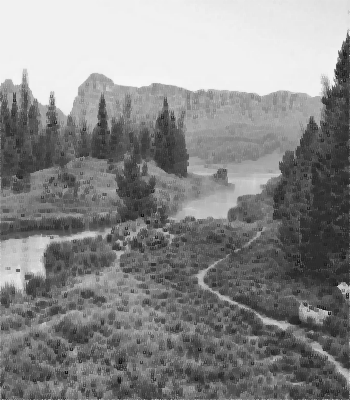

In [ ]:
minFilter2(gray_image)

# 7.	Apply image smoothening (say, median filter, max filter, min filter, average filter) to any of 5x5 region of interest in the grayscale image

#Average Filter

In [ ]:
def meanFilter_5(image):
  kernel = np.array([[1/25,1/25,1/25,1/25,1/25],[1/25,1/25,1/25,1/25,1/25],[1/25,1/25,1/25,1/25,1/25],[1/25,1/25,1/25,1/25,1/25],[1/25,1/25,1/25,1/25,1/25]])
  image_mean = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
  print(image_mean)
  cv2_imshow(image_mean)

[[241 241 241 ... 223 222 222]
 [241 241 241 ... 223 222 222]
 [241 241 241 ... 223 222 222]
 ...
 [130 120 117 ...  98 103 104]
 [133 123 119 ...  99 103 103]
 [131 121 117 ... 103 105 101]]


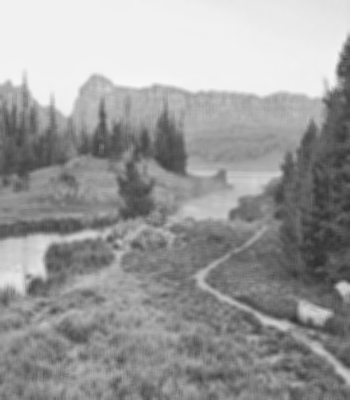

In [ ]:
meanFilter_5(gray_image)

Manual Code:

In [ ]:
def meanFilter2_5(image):
  image = image.astype(np.float64)
  shape = image.shape
  R = shape[0]
  C = shape[1]
  print(type(image[0][0]))
  for i in range(2,R-2):
    for j in range(2,C-2):
      image[i][j] = (image[i-2][j-2] + image[i-2][j-1] + image[i-2][j]+ image[i-2][j+1]+ image[i-2][j+2]+ image[i-1][j-2]+ image[i-1][j-1]+ image[i-1][j]+ image[i-1][j+1]+ image[i-1][j+2]+ image[i][j-2]+ image[i][j-1]+ image[i][j] + image[i][j+1]+ image[i][j+2]+ image[i+1][j-2]+ image[i+1][j-1]+ image[i+1][j]+ image[i+1][j+1]+ image[i+1][j+2]+ image[i+2][j-2]+ image[i+2][j-1]+ image[i+2][j]+ image[i+2][j+1]+ image[i+2][j+2])/25
  cv2_imshow(image)

<class 'numpy.float64'>


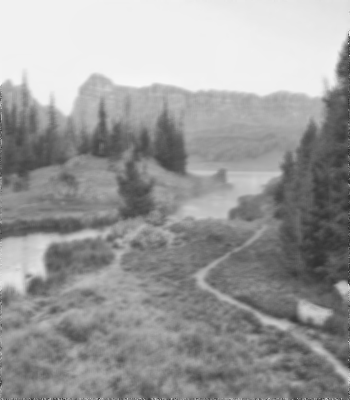

In [ ]:
meanFilter2_5(gray_image)

# Median Filter

In [ ]:
def medianFilter_5(image):
  median = cv2.medianBlur(image,5)
  cv2_imshow(median)

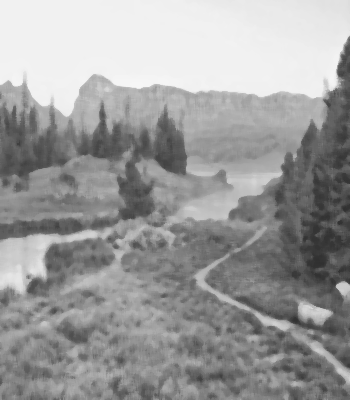

In [ ]:
medianFilter_5(gray_image)

Manual code:

In [ ]:
import statistics

def medianFilter2_5(image):
  image = image.astype(np.float64)
  shape = image.shape
  R = shape[0]
  C = shape[1]
  print(type(image[0][0]))
  for i in range(2,R-2):
    for j in range(2,C-2):
      neighbours = [image[i-2][j-2] , image[i-2][j-1] , image[i-2][j], image[i-2][j+1], image[i-2][j+2], image[i-1][j-2], image[i-1][j-1], image[i-1][j], image[i-1][j+1], image[i-1][j+2], image[i][j-2], image[i][j-1], image[i][j+1], image[i][j+2], image[i+1][j-2], image[i+1][j-1], image[i+1][j], image[i+1][j+1], image[i+1][j+2], image[i+2][j-2], image[i+2][j-1], image[i+2][j], image[i+2][j+1], image[i+2][j+2]]
      image[i][j] = statistics.median(neighbours)
  cv2_imshow(image)

<class 'numpy.float64'>


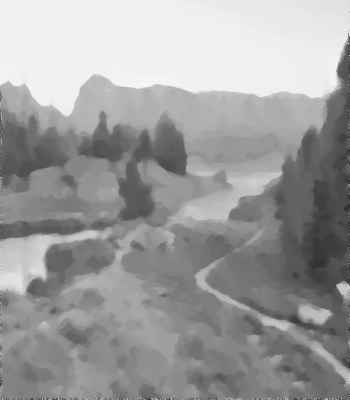

In [ ]:
medianFilter2_5(gray_image)

## Max Filter

In [ ]:
def maxFilter_5(image):
  size = (5, 5)
  shape = cv2.MORPH_RECT
  kernel = cv2.getStructuringElement(shape, size)
  min_image = cv2.dilate(image, kernel)
  cv2_imshow(min_image)

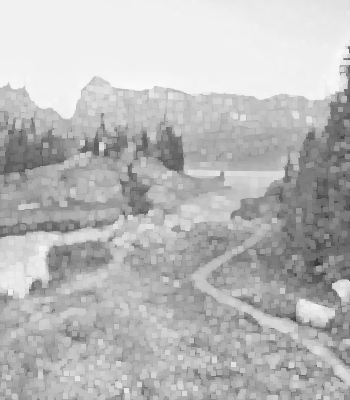

In [ ]:
maxFilter_5(gray_image)

Manual Code:

In [ ]:
def maxFilter2_5(image):
  shape = image.shape
  temp = image.copy()
  R = shape[0]
  C = shape[1]
  print(type(image[0][0]))
  for i in range(2,R-2):
    for j in range(2,C-2):
      temp[i][j] = max(image[i-2][j-2] , image[i-2][j-1] , image[i-2][j], image[i-2][j+1], image[i-2][j+2], image[i-1][j-2], image[i-1][j-1], image[i-1][j], image[i-1][j+1], image[i-1][j+2], image[i][j-2], image[i][j-1], image[i][j+1], image[i][j+2], image[i+1][j-2], image[i+1][j-1], image[i+1][j], image[i+1][j+1], image[i+1][j+2], image[i+2][j-2], image[i+2][j-1], image[i+2][j], image[i+2][j+1], image[i+2][j+2])
  cv2_imshow(temp)

<class 'numpy.uint8'>


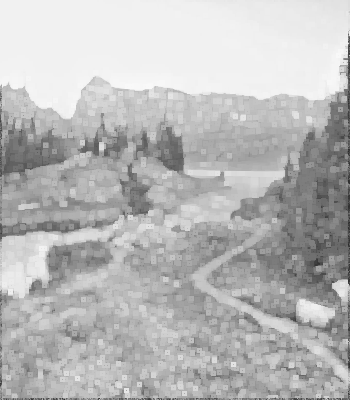

In [ ]:
maxFilter2_5(gray_image)

## Min Filter

In [ ]:
def minFilter_5(image):
  size = (5, 5)
  shape = cv2.MORPH_RECT
  kernel = cv2.getStructuringElement(shape, size)
  min_image = cv2.erode(image, kernel)
  cv2_imshow(min_image)

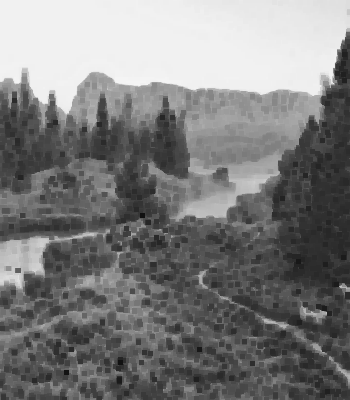

In [ ]:
minFilter_5(gray_image)

Manual Code:

In [ ]:
def minFilter2_5(image):
  shape = image.shape
  temp = image.copy()
  R = shape[0]
  C = shape[1]
  print(type(image[0][0]))
  for i in range(2,R-2):
    for j in range(2,C-2):
      temp[i][j] = min(image[i-2][j-2] , image[i-2][j-1] , image[i-2][j], image[i-2][j+1], image[i-2][j+2], image[i-1][j-2], image[i-1][j-1], image[i-1][j], image[i-1][j+1], image[i-1][j+2], image[i][j-2], image[i][j-1], image[i][j+1], image[i][j+2], image[i+1][j-2], image[i+1][j-1], image[i+1][j], image[i+1][j+1], image[i+1][j+2], image[i+2][j-2], image[i+2][j-1], image[i+2][j], image[i+2][j+1], image[i+2][j+2])
  cv2_imshow(temp)

<class 'numpy.uint8'>


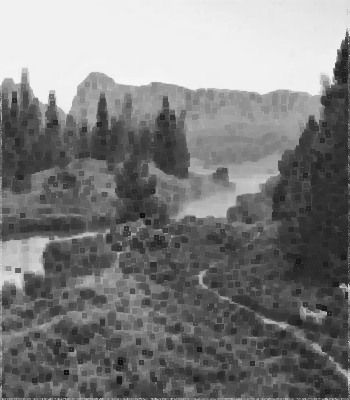

In [ ]:
minFilter2_5(gray_image)

# 8.	Write the inference obtained from 6,7

5x5 kernel removes more noise from the image but it blurs out edges more. The 3x3 kernel removes noise adequately with lesser blurring comparatively.